In [117]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,f1_score,precision_score,recall_score

Importing libraries required for text preprocessing

In [118]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('all')

In [120]:
data=pd.read_csv('/content/sentiment_tweets3.csv')

In [121]:
data.shape

(10314, 3)

In [122]:
data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


Plotting the number of tweets based on value of depression (0-not depressed,1-depressed)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


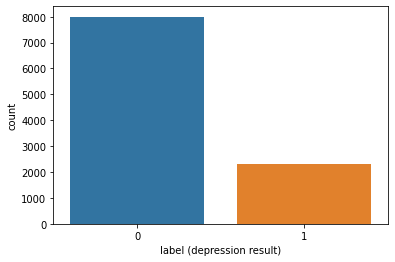

In [123]:
sns.countplot(data['label (depression result)']);

In [124]:
data.columns

Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


#Text Preprocessing

In [126]:
sw=stopwords.words('english')
porter=PorterStemmer()
lemm=WordNetLemmatizer()

In [127]:
def urls_ats(content):
  final= re.sub(r"http\S+", " ", content)
  final= re.sub(r"@\S+"," ",final)
  return final

In [128]:
def processed(content):
  processed_content=re.sub("[^a-zA-Z]"," ",content)
  processed_content=processed_content.lower()
  processed_content=processed_content.split()
  processed_content= [porter.stem(word) for word in processed_content if not word in sw] #Stemming and stopwords removal
  processed_content = [lemm.lemmatize(word) for word in processed_content]  #lemmatizing
  processed_content=' '.join(processed_content)
  return processed_content
  

In [129]:
data['message to examine']=data['message to examine'].apply(urls_ats)
data['message to examine']=data['message to examine'].apply(processed)

In [130]:
data['message to examine']

0                               real good moment miss much
1                                               read manga
2                                                         
3        need send em account tomorrow oddli even refer...
4                          add myspac myspac com lookthund
                               ...                        
10309        depress g herbo mood done stress peopl deserv
10310    depress succumb brain make feel like never enough
10311    ketamin nasal spray show promis depress suicid...
10312               dont mistak bad day depress everyon em
10313                                                     
Name: message to examine, Length: 10314, dtype: object

In [131]:
X=data['message to examine'].values
y=data['label (depression result)'].values

#Vectorization

In [132]:
tfidf=TfidfVectorizer()
tfidf.fit(X)
X=tfidf.transform(X)

#Splitting the data

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [135]:
mnb=MultinomialNB()
logreg=LogisticRegression()
svc=SVC()
dtc =  DecisionTreeClassifier()
gbc=GradientBoostingClassifier()
rfc= RandomForestClassifier()

In [136]:
mnb.fit(X_train,y_train)
logreg.fit(X_train,y_train)
svc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [137]:
mt1=mnb.score(X_train,y_train)
mt2=logreg.score(X_train,y_train)
mt3=svc.score(X_train,y_train)
mt4=dtc.score(X_train,y_train)
mt5=rfc.score(X_train,y_train)
mt6=gbc.score(X_train,y_train)
train=[mt1,mt2,mt3,mt4,mt5,mt6]
train

[0.9449763665010302,
 0.9924857593019027,
 0.9990304205550843,
 0.9995152102775421,
 0.9995152102775421,
 0.9995152102775421]

In [138]:
m1=mnb.score(X_test,y_test)
m2=logreg.score(X_test,y_test)
m3=svc.score(X_test,y_test)
m4=dtc.score(X_test,y_test)
m5=rfc.score(X_test,y_test)
m6=gbc.score(X_test,y_test)
test=[m1,m2,m3,m4,m5,m6]
test

[0.9132331555986427,
 0.9815802229762481,
 0.9922443044110518,
 0.9961221522055259,
 0.9970916141541445,
 0.9961221522055259]

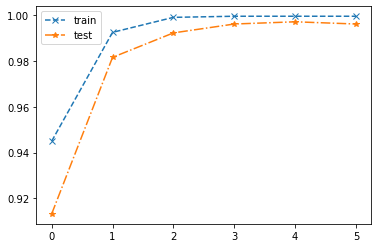

In [139]:
plt.plot(train,linestyle='dashed',label='train',marker='x')
plt.plot(test,linestyle='dashdot',label='test',marker='*')
plt.legend()
plt.show()

In [140]:
final_model=GradientBoostingClassifier()
final_model.fit(X_train,y_train)
y_pred_final=final_model.predict(X_test)

#Model accuracies

In [141]:
final_model.score(X_train,y_train)

0.9995152102775421

In [142]:
final_model.score(X_test,y_test)

0.9961221522055259

#F1_score

In [143]:
precision=precision_score(y_test, y_pred_final,pos_label='positive',average='micro')
recall=recall_score(y_test, y_pred_final,pos_label='positive',average='micro')
f1_score=(2*precision*recall)/(precision+recall)
f1_score

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9961221522055259

#Confusion matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


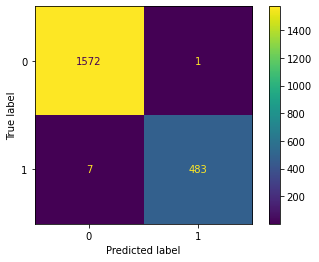

In [144]:
plot_confusion_matrix(final_model,X_test,y_test);  #label-0 = no depression , label-1 = depression